## Group project 

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style="darkgrid")
random.seed(10)
import math
import scipy.stats

## Generate the synthetic data set 

In [10]:
bernoulli = random.random()
print(f'Random bernoulli variable is assigned as {bernoulli}')
x = np.random.uniform(0, 10, 1000)
label = np.random.binomial(1, bernoulli, 1000)
noise_a = np.random.normal(0, 1, 1000) 
noise_b = np.random.normal(1, 3, 1000)
d = {'x': x, 'label': label, 'noise_a': noise_a, 'noise_b': noise_b}
df = pd.DataFrame(data=d)
df.loc[df.label == 0, 'y'] = df.x * 3 + 2 + df.noise_a
df.loc[df.label == 1, 'y'] = df.x * 4 + 4 + df.noise_b
df

Random bernoulli variable is assigned as 0.5780913011344704


,x,label,noise_a,noise_b,y
0,4.536747,0,0.772877,8.154043,16.383119
1,2.521857,1,0.417392,0.174814,14.262243
2,9.039490,1,-0.664069,-1.701528,38.456433
3,9.484084,0,0.518662,-1.542933,30.970913
4,7.232145,0,-0.296042,1.233460,23.400392
...,...,...,...,...,...
995,7.601006,0,-0.718432,1.584230,24.084587
996,4.436114,0,1.332885,3.785337,16.641227
997,1.960949,1,-0.537700,1.141545,12.985342
998,1.957345,0,0.237516,1.172723,8.109551


## Plotting the data for a first overview 

<AxesSubplot:xlabel='x', ylabel='y'>

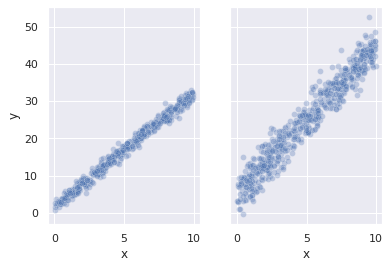

In [11]:
fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df[df.label == 0],x='x', y='y', alpha=0.3,ax=ax[0])
sns.scatterplot(data=df[df.label == 1],x='x', y='y', alpha=0.3,ax=ax[1])


<AxesSubplot:xlabel='x', ylabel='y'>

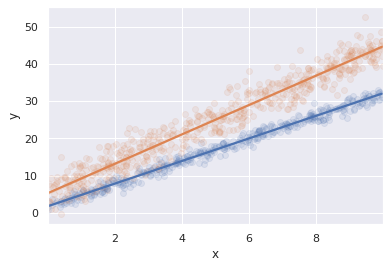

In [12]:
sns.regplot(data=df[df.label == 0],x='x', y='y',scatter_kws={'alpha':0.1})
sns.regplot(data=df[df.label == 1],x='x', y='y',scatter_kws={'alpha':0.1})


<AxesSubplot:xlabel='x', ylabel='Density'>

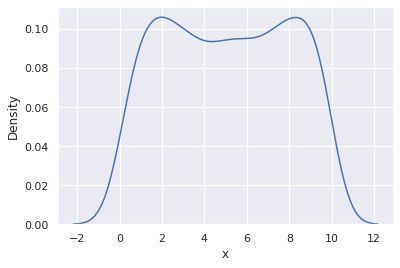

In [13]:
sns.kdeplot(data=df.x)

# Second part: mathematical background 

To Do !

# Third part: Implementation of the EM algorithm 

## Initialization 

In [14]:
def initialize_parameter_list(d):
    d['variance_a']=random.randint(1, 3)
    d['variance_b']=random.randint(1, 3)
    d['beta_a0'] = random.uniform(0,5)
    d['beta_a1'] = random.uniform(0,5)
    d['beta_b0'] = random.uniform(0,5)
    d['beta_b1'] = random.uniform(0,5)
    d['prob_a'] = random.random()
    d['prob_b'] = 1 - d['prob_a']
    return d

In [15]:
# initialization of the parameter
params = initialize_parameter_list({})
params

{'variance_a': 1,
 'variance_b': 2,
 'beta_a0': 4.0666062567866,
 'beta_a1': 4.117944362667227,
 'beta_b0': 3.2673626695058786,
 'beta_b1': 0.8011477825940982,
 'prob_a': 0.5206693596399246,
 'prob_b': 0.47933064036007544}

## Setting the weights 

## Expectation step

In [16]:
##Expectation step
def Estep(p):
   
    #Set the values for the algorithm
    w_a_numerator  = p['prob_a'] * (1/np.sqrt(2*np.pi*p['variance_a'])) * np.exp((-(1/(2*p['variance_a'])) * (df.y - p['beta_a0'] - p['beta_a1']*df.x)**2))
    w_b_numerator  = p['prob_b'] * (1/np.sqrt(2*np.pi*p['variance_b'])) * np.exp((-(1/(2*p['variance_b'])) * (df.y - p['beta_b0'] - p['beta_b1']*df.x)**2))
    p['w_sum'] = w_a_numerator + w_b_numerator
    p['w_a'] = w_a_numerator/p['w_sum']
    p['w_b'] = w_b_numerator/p['w_sum']
    
    return p


## Maximisation step

In [17]:
## Maximisation step:
def Mstep(p, df):

    #Update the function following the derived update rules:
    
    #Update the prior beliefs
    p['prob_a'] = p['w_a'].sum()/(p['w_a'].sum() +p['w_b'].sum()).sum()
    p['prob_b'] = p['w_b'].sum()/(p['w_a'].sum() +p['w_b'].sum()).sum()
    
    #Update the betas for each subgroup
    #Beta_0
    
    p['beta_a0'] = ((df.y - p['beta_a1']*df.x)*p['w_a']).sum()/p['w_a'].sum() 
    p['beta_b0'] = ((df.y - p['beta_b1']*df.x)*p['w_b']).sum()/p['w_b'].sum() 
  
    #New beta formula
    p['beta_a1'] = ((df.y*df.x - p['beta_a0']*df.x)*p['w_a']).sum()/(p['w_a']*df.x**2).sum() 
    p['beta_b1'] = ((df.y*df.x - p['beta_b0']*df.x)*p['w_b']).sum()/(p['w_b']*df.x**2).sum() 
    #print('beta1', beta_a1, beta_b1)
    
    #Update the variance 
    #Define the residuals first
    e_hat_a = df.y - p['beta_a0']-p['beta_a1']*df.x
    e_hat_b = df.y - p['beta_b0']-p['beta_b1']*df.x
    #print('ehat', e_hat_a, e_hat_b)
    
    #Define the variance 

    p['variance_a'] = ((e_hat_a**2)*p['w_a']).sum()/p['w_a'].sum()
    p['variance_b'] = ((e_hat_b**2)*p['w_b']).sum()/p['w_b'].sum()

    return p
    

In [18]:
Mstep(Estep(params),df)


{'variance_a': 23.493615023621206,
 'variance_b': 20.6638151850801,
 'beta_a0': 2.3722812047894295,
 'beta_a1': 3.971863856128669,
 'beta_b0': 9.69669798115771,
 'beta_b1': 1.4946248344623003,
 'prob_a': 0.7032811237027193,
 'prob_b': 0.29671887629728066,
 'w_sum': 0      3.535590e-10
 1      2.040311e-01
 2      3.741826e-03
 3      1.812891e-33
 4      6.831139e-24
            ...     
 995    3.809982e-25
 996    1.903956e-08
 997    1.455179e-01
 998    9.337040e-03
 999    2.061480e-01
 Length: 1000, dtype: float64,
 'w_a': 0      0.933527
 1      1.000000
 2      1.000000
 3      1.000000
 4      0.060258
          ...   
 995    0.000124
 996    0.999759
 997    1.000000
 998    0.006963
 999    1.000000
 Length: 1000, dtype: float64,
 'w_b': 0      6.647263e-02
 1      1.192986e-09
 2      5.721988e-84
 3      9.644200e-13
 4      9.397416e-01
            ...     
 995    9.998757e-01
 996    2.407751e-04
 997    5.777565e-08
 998    9.930369e-01
 999    3.256665e-29
 Length: 1

## Defining the average likelihood function

In [19]:
def get_avg_log_likelihood(p,df):
    
    Q_function_a = -1/2*((p['w_a']*((df.y-p['beta_a0']-p['beta_a1']*df.x)**2-math.log(p['variance_a']))).sum())
    Q_function_b = -1/2*((p['w_b']*((df.y-p['beta_b0']-p['beta_b1']*df.x)**2-math.log(p['variance_b']))).sum())
    
    Q_function = Q_function_a + Q_function_b
    
    return Q_function

In [20]:
def run_em(p,df):
    avg_loglikelihoods = []
    p = initialize_parameter_list(p) #initialize params
    
    while True: 
        p = Mstep(Estep(p),df) # EM step
                
        #Evaluate the loglikelihood function
        avg_loglikelihood = get_avg_log_likelihood(p,df)
        avg_loglikelihoods.append(avg_loglikelihood)
        slope = 1/avg_loglikelihood
        if len(avg_loglikelihoods)>2 and (avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0:
            break
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.0001: #Define a stopping criterion
            break
    
    return p, avg_loglikelihoods


In [21]:
new_params, log_likelies = run_em(params, df)

In [22]:
log_likelies[:10]

[-14319.646953026275,
 -12638.19807222976,
 -11575.994638454942,
 -10944.482771979825,
 -10577.974622858132,
 -10367.855283124443,
 -10248.116813204202,
 -10180.098663889354,
 -10141.532764017506,
 -10119.693536581595]

## Plotting the iterations 

In [23]:
iterations = np.arange(0,len(log_likelies),1)
data_log = pd.DataFrame(data={'logs': log_likelies, 'iterations': iterations})

In [24]:
data_log

,logs,iterations
0,-14319.646953,0
1,-12638.198072,1
2,-11575.994638,2
3,-10944.482772,3
4,-10577.974623,4
...,...,...
154,-2053.024696,154
155,-2053.024539,155
156,-2053.024407,156
157,-2053.024297,157


<AxesSubplot:xlabel='iterations', ylabel='logs'>

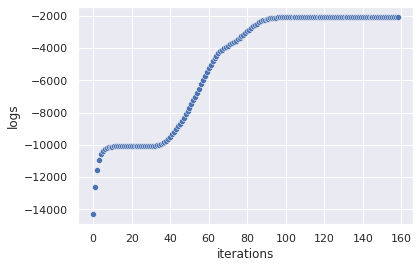

In [25]:
sns.scatterplot(x = 'iterations', y = 'logs', data = data_log)

In [26]:
betas_a0 = []
betas_a1 = []
betas_b0 = []
betas_b1 = []
iterations = []
i = 0

for i in range(0,1000):
    parameter_list = initialize_parameter_list({})
    try:
        new_params, log_likelies = run_em(parameter_list, df)
    except:
        "math error"
    betas_a0.append(new_params['beta_a0'])
    betas_a1.append(new_params['beta_b0'])
    betas_b0.append(new_params['beta_a1'])
    betas_b1.append(new_params['beta_b1'])
    i+= 1
    iterations.append(i)

Text(0.5, 1.0, 'Beta B1')

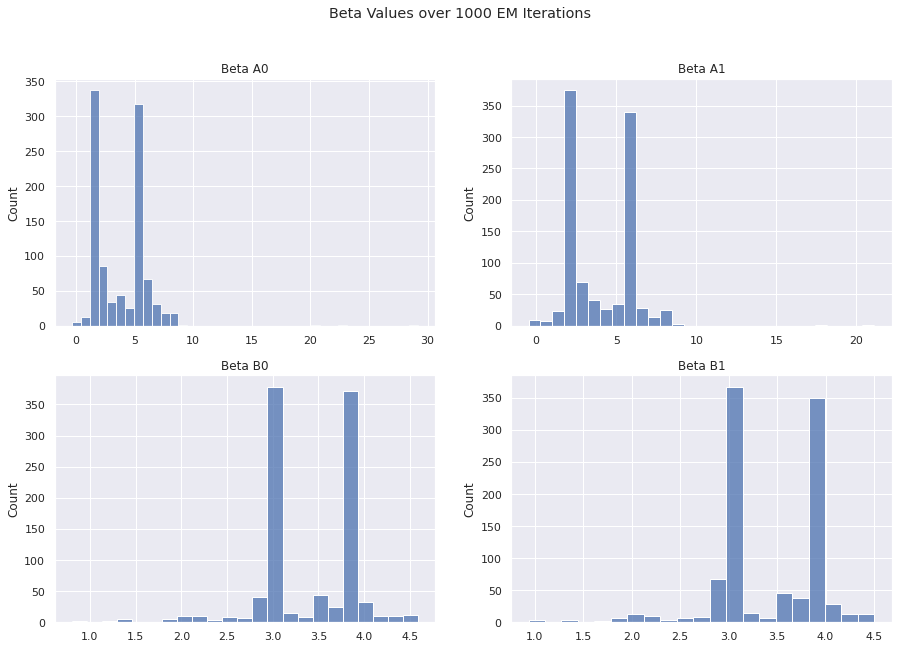

In [27]:
# sns.scatterplot(x = betas_a0, y = iterations)
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle(f'Beta Values over {i} EM Iterations')
sns.histplot(x=betas_a0, ax=axes[0, 0]).set_title('Beta A0')
sns.histplot(x=betas_a1, ax=axes[0, 1]).set_title('Beta A1')
sns.histplot(x=betas_b0, ax=axes[1, 0]).set_title('Beta B0')
sns.histplot(x=betas_b1, ax=axes[1, 1]).set_title('Beta B1')